<p style ="color: #d90429;
                    font-size:50px; 
                    font-style:bold;
                    text-decoration: underline;
                    text-align: center ">
    Thyroid Disease Detection
</p>


<center><img src ='https://nci-media.cancer.gov/pdq/media/images/719086-571.jpg' ></center>

<h2 style ="color: #fb8500;font-size:35px; font-style:bold; text-decoration: underline;"> Step 1: Acquire </h2>

### Step 1.a: Explore Problem
    
##### Problem is to detect Thyroid Disease.<br>

   
### Step 1.b: Indentify Data

##### Thyroid Disease dataset are availble in <a href = 'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/'>uci</a> website .
 

### Step 1.c: About Data 

    [Thyroid disease records supplied by the Garavan Institute and J. Ross
    Quinlan, New South Wales Institute, Syndney, Australia.1987.]
    

    classes: increased binding protein, decreased binding protein,negative.			

    age:                                                       continuous.
    sex:				                                         M, F.
    on thyroxine:			                                     f, t.
    query on thyroxine:		                                     f, t.
    on antithyroid medication:	                                 f, t.
    sick:				                                         f, t.
    pregnant:			                                         f, t.
    thyroid surgery:		                                     f, t.
    I131 treatment:			                                     f, t.
    query hypothyroid:		                                     f, t.
    query hyperthyroid:		                                     f, t.
    lithium:			                                         f, t.
    goitre:				                                         f, t.
    tumor:				                                         f, t.
    hypopituitary:			                                     f, t.
    psych:				                                         f, t.
    TSH measured:			                                     f, t.
    TSH:(Thyroid stimulating hormone)				             continuous.
    T3 measured:			                                     f, t.
    T3:				                                             continuous.
    TT4 measured:			                                     f, t.
    TT4:				                                         continuous.
    T4U measured:			                                     f, t.
    T4U:(Thyroxine utilization rate)				             continuous.
    FTI measured:			                                     f, t.
    FTI:				                                         continuous.
    TBG measured:			                                     f, t.
    TBG:				                                         continuous.
    referral source:		                                     WEST, STMW, SVHC, SVI, SVHD, other.

    
 `Thyroid-binding globulin (TBG) is produced in the liver and is a circulating protein that reversibly binds to thyroid hormones 3,5,3’-triiodothyronine (T3) and thyroxine (T4) and carries them in the bloodstream.`
 
 
         `FTI(Free Thyroxine Index) = Thyroxine (T4) / Thyroid binding capacity.`
         `T4U = Thyroxine utilization rate`
         `TSH = Thyroid stimulating hormone`
         `TT4 = Total Thyroxine` 
         `TT3 = Total Triiodothyronine`
         `T4 = Thyroxine` 
         `T3 = Triiodothyronine`
         `f = False (0)`
         `t = True(1)`
         `M = Male`
         `F = Female`
         
         
<center><img src='https://i.pinimg.com/originals/a3/c9/dd/a3c9ddf24b0f6ae66c49571f15c305a0.jpg'></center>       
 

<h5 style ="color: #fb8500;font-size:35px; font-style:bold; text-decoration: underline;"> About Thyroid Classes </h5>
 
 * `Increased binding protein` - `Hypothyroidism`
     
         Increased TBG levels may be due to hypothyroidism, liver disease, and pregnancy. In cases of high TBG, more thyroid hormone will be bound, decreasing free hormone in the blood.
 
 * `Decreased binding protein` - `Hyperthyroidism`
 
         Decreased TBG levels may also be due to hyperthyroidism, renal disease, liver disease, severe systemic illness, Cushing syndrome, medications, and malnutrition. If TBG levels are low, total thyroid levels will be low and free thyroid hormone levels may be normal or low.
     
 * `Negative - No Thyroid`
 
<h5 style ="color: #fb8500;font-size:35px; font-style:bold; text-decoration: underline;"> Thyroid Symptoms </h5>
<img src ='https://www.verywellhealth.com/thmb/XBdgIUhlNw6AmO55fwqyP5joQ28=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/Hypothyroidism-hyperthyroidism-5180646_final-82b76c2edd074f59aa005f72ba2a3994.jpg'>


### Step 1.d: Import Libary 


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
name_path = r'Data/allbp_names.csv'
data_path = r'Data/allbp_data.csv'
test_path = r'Data/allbp_test.csv'

In [3]:
name_df = pd.read_csv(name_path,skiprows=9,on_bad_lines='skip')
name_df.head()

,age:\t\t\t\tcontinuous.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN
1,sex:\t\t\t\tM,F.,NaN,NaN,NaN,NaN
2,on thyroxine:\t\t\tf,t.,NaN,NaN,NaN,NaN
3,query on thyroxine:\t\tf,t.,NaN,NaN,NaN,NaN
4,on antithyroid medication:\tf,t.,NaN,NaN,NaN,NaN


In [4]:
name_df.dropna(axis=1,how='any',inplace=True)

In [5]:
name_df.head(2)

,age:\t\t\t\tcontinuous.
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [6]:
name_df.rename(columns={"age:\t\t\t\tcontinuous.":"Name"},inplace=True)

In [7]:
name_df.head(2)

,Name
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [8]:
Column_name =[i[0] for i in name_df['Name'].str.split(':')]
              

In [9]:
Column_name

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source']

In [10]:
Column_name.append('Classes')


In [11]:
len(Column_name)

30

In [12]:
data_df = pd.read_csv(data_path,names=Column_name)
data_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [13]:
data_df.shape

(2800, 30)

In [14]:
test_df = pd.read_csv(test_path,names=Column_name,index_col=False)
test_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.5,t,2.5,t,108,t,0.96,t,113,f,?,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.6,t,2.4,t,61,t,0.82,t,75,f,?,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141,f,?,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,1.3,t,120,t,0.84,t,143,f,?,SVI,negative.|487


In [15]:
test_df.shape

(972, 30)

In [16]:
data = pd.concat([data_df,test_df],ignore_index=True)

In [17]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


# EDA

In [18]:
len(data)

3772

In [19]:
data.shape

(3772, 30)

In [20]:
# checking '?' or null value in 'age'

print('No. of null value in Age :',data[data['age'] =='?']['age'].count())

No. of null value in Age : 1


In [21]:
# checking '?' or null value in 'sex'

print('No. of null value in Sex :',data[data['sex'] =='?']['sex'].count())

No. of null value in Sex : 150


### Replace '?' with NaN

In [22]:

data =data.apply(lambda x : x.replace('?',np.nan))

In [23]:
data.dtypes

age                           object
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                           object
T3 measured                   object
T3                            object
TT4 measured                  object
TT4                           object
T4U measured                  object
T4U                           object
FTI measured                  object
FTI                           object
TBG measured                  object
T

In [24]:
# null count

data.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Classes       

# Feature  Engineering

In [25]:
# Drop referral source column and 'TBG measured' carry 0 in all 'TBG' as  carry Null 

data.drop(columns=['referral source','TBG measured', 'TBG'],inplace=True)

In [26]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'Classes'],
      dtype='object')

In [27]:
# Numeric Feature list

num_col = ['age','TSH','T3','TT4','T4U','FTI']
len(num_col)

6

In [28]:
# Categorical Feature list

cat_col = [col for col in data.columns if col not in num_col]
len(cat_col)

21

In [29]:
# need to clearn the  data

data[['Classes']].head()

,Classes
0,negative.|3733
1,negative.|1442
2,negative.|2965
3,negative.|806
4,negative.|2807


In [30]:
# cleaning the classes

data['Classes'] = data['Classes'].apply(lambda x : x[:x.find(".")])

In [31]:
data['Classes'].value_counts()

negative                     3609
increased binding protein     149
decreased binding protein      14
Name: Classes, dtype: int64

data = data.apply(lambda x : x.replace('?','0'))

In [32]:
data.head(2)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,negative


In [33]:
# changing Value Name in Classes

data['Classes']= data['Classes'].map({'negative':'Negative','increased binding protein':'Hypothyroidism','decreased binding protein':'Hyperthyroidism'})

In [34]:
data['Classes'].value_counts()

Negative           3609
Hypothyroidism      149
Hyperthyroidism      14
Name: Classes, dtype: int64

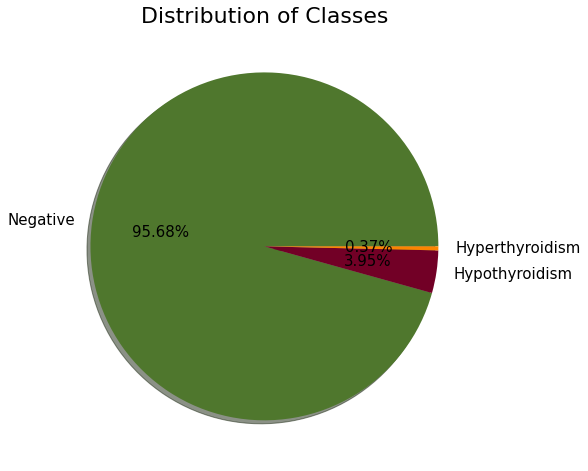

In [35]:
plt.figure(facecolor="white",figsize=(8,8))
plt.pie(data['Classes'].value_counts(), labels=['Negative','Hypothyroidism','Hyperthyroidism'] ,colors=['#4f772d','#720026','#fb8500'], autopct='%0.2f%%',shadow=True,textprops={'fontsize': 15});
plt.title("Distribution of Classes",fontsize=22);

In [36]:
# Change data type of Numerical feature Object to (Int-Float)

data[num_col] = data[num_col].astype('float64')


In [37]:
data.dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
Classes                       object
d

In [38]:

data[num_col].head()

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.30,2.5,125.0,1.14,109.0
1,23.0,4.10,2.0,102.0,NaN,NaN
2,46.0,0.98,NaN,109.0,0.91,120.0
3,70.0,0.16,1.9,175.0,NaN,NaN
4,70.0,0.72,1.2,61.0,0.87,70.0


In [39]:
# Cheacking Numerical Feature null 

data[num_col].isna().sum()

age      1
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

In [40]:
data[data['age'].isna()==True]

# Female  has the age Null value so Fill Null with Female Mean Value

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
1985,NaN,F,t,f,f,f,f,f,t,f,f,f,f,f,f,f,t,0.6,t,1.5,t,120.0,t,0.82,t,146.0,Negative


In [41]:
len(data)

3772

In [42]:
# Remove Null Value in Numerical Column
data['sex'].value_counts()

# Female has more count than Male

F    2480
M    1142
Name: sex, dtype: int64

In [43]:
female_age_mean = round(data[data['sex']=='F']['age'].mean())
female_age_mean

52

In [44]:
# Replace Null with  Female age Mean

data['age'] = data['age'].fillna(female_age_mean)

In [45]:
data['age'].isna().sum()

0

In [46]:
# Cheacking Categorical Feature null

data[cat_col].isna().sum()

sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
T3 measured                    0
TT4 measured                   0
T4U measured                   0
FTI measured                   0
Classes                        0
dtype: int64

In [47]:
data['sex'].isna().sum()

150

In [48]:
data[data['sex'].isna()==True]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
16,42.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.20,t,1.8,t,70.0,t,0.86,t,81.0,Negative
47,21.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,t,1.8,t,163.0,t,1.05,t,155.0,Negative
61,42.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.02,t,2.6,t,138.0,t,1.58,t,88.0,Negative
64,38.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.90,t,1.8,t,93.0,t,0.95,t,98.0,Negative
69,45.0,NaN,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,9.00,t,2.8,t,237.0,t,1.17,t,203.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,38.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.20,t,2.0,t,101.0,t,1.01,t,100.0,Negative
3566,47.0,NaN,f,f,f,t,f,f,f,f,f,f,f,f,f,f,t,0.02,t,1.9,t,111.0,t,0.93,t,119.0,Negative
3574,22.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.10,t,2.7,t,136.0,t,1.27,t,107.0,Negative
3630,40.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.10,t,0.6,t,79.0,t,0.91,t,87.0,Negative


In [49]:
# fill sex null value with most frequent (mode)

from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
data[['sex']] = imputer_mode.fit_transform(data[['sex']])

In [50]:
data['sex'].isna().sum()

0

In [51]:
data['sex'].value_counts()

F    2630
M    1142
Name: sex, dtype: int64

In [52]:
# null check

data[num_col].isna().sum()


age      0
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

In [53]:
num_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [54]:
# fill null value with  Zero (0) Why zero(0) coz if measures are False than automatic numeric value are Zero(0)

imputer_constant = SimpleImputer(strategy='constant',fill_value=0)
data[num_col] = imputer_constant.fit_transform(data[num_col])

In [55]:
# null check

data[num_col].isna().sum()


age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64

In [56]:
data[num_col].dtypes

# need to change age data type float64 to int64

age    float64
TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object

In [57]:
# change datatype

data[['age']]=data[['age']].astype('int64')

In [58]:
data.dtypes

age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
Classes                       object
d

In [59]:
# Final data Type Check in numeric feature
data[num_col].dtypes

age      int64
TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object

In [60]:
# Final data Type Check in Caterigocal feature
data[cat_col].dtypes

sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
T3 measured                  object
TT4 measured                 object
T4U measured                 object
FTI measured                 object
Classes                      object
dtype: object

In [61]:
data.head(15)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,Negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,0.00,f,0.0,Negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,0.0,t,109.0,t,0.91,t,120.0,Negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,0.00,f,0.0,Negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,Negative
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,0.0,t,183.0,t,1.30,t,141.0,Negative
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.00,f,0.0,t,72.0,t,0.92,t,78.0,Negative
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.20,t,0.6,t,80.0,t,0.70,t,115.0,Negative
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.60,t,2.2,t,123.0,t,0.93,t,132.0,Negative
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.40,t,1.6,t,83.0,t,0.89,t,93.0,Negative


In [62]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735949,4.589148,1.603006,101.685790,0.892915,99.194247
std,20.082296,23.339839,1.096918,43.182478,0.354204,45.846407
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.750000
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


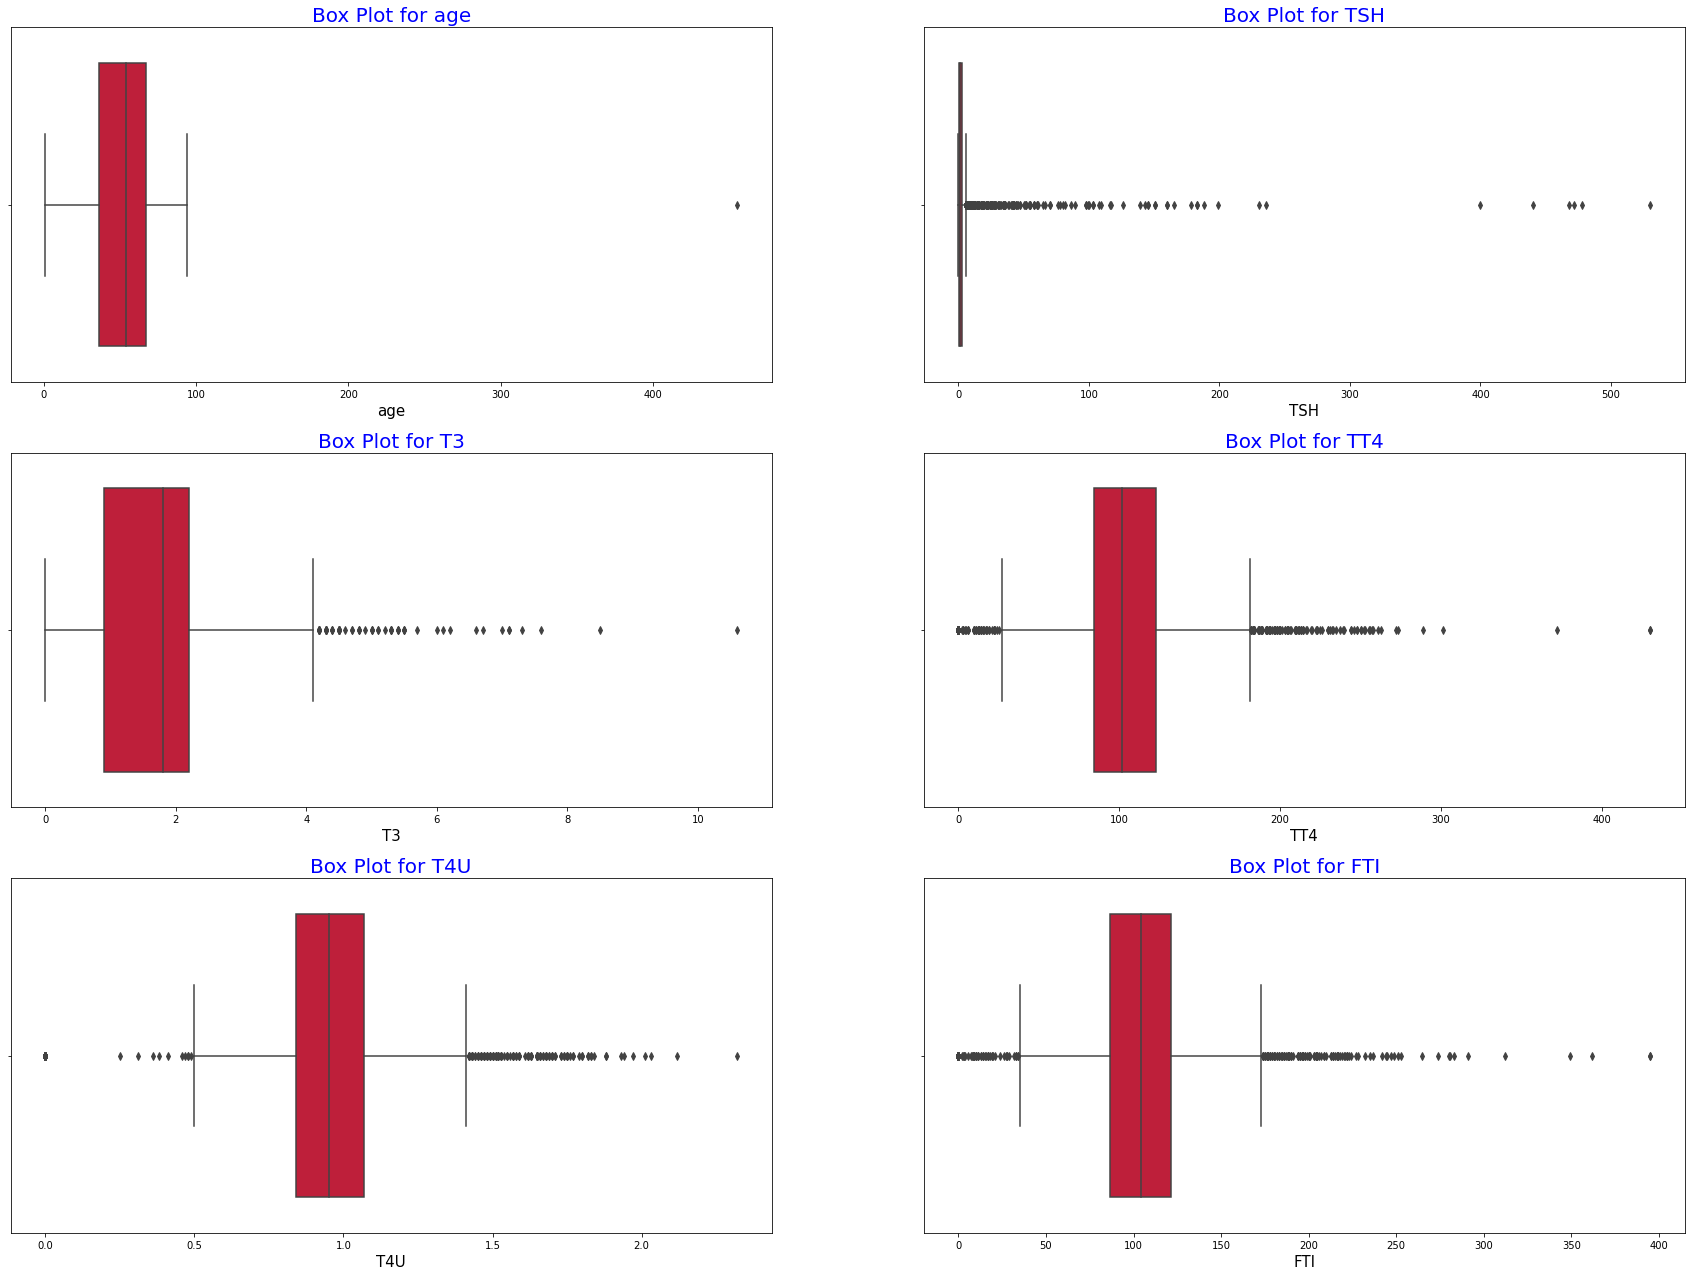

In [63]:
plt.figure(figsize=(30,30))
for row,col in enumerate(num_col):
    plt.subplot(4,2,row+1)
    sns.boxplot(data[col],color='#d90429')
    plt.title("Box Plot for "+col,fontsize=20,color='Blue')
    plt.xlabel(col,fontsize=15)

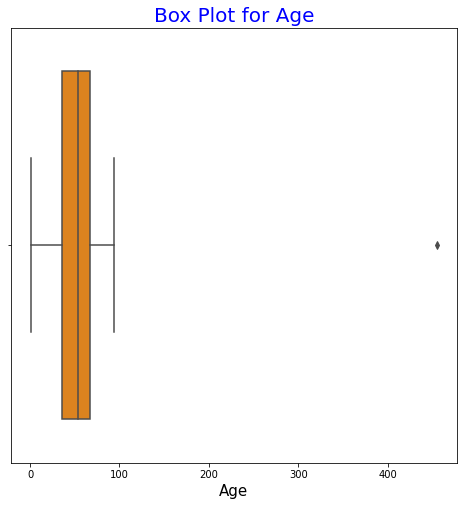

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(data['age'],color='#fb8500')
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

In [65]:
# need to remove Outlier from Age no one has 455 age
data['age'].describe()

count    3772.000000
mean       51.735949
std        20.082296
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64

In [66]:
# Removing Outliers 

Q1 = data['age'].quantile(.25)
Q3 = data['age'].quantile(.75)
IQR = Q3-Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

print("Q1(25%) :",Q1)
print("Q3(75%) :",Q3)
print("IQR :",IQR)
print("Lower :",lower)
print("Upper :",upper)

Q1(25%) : 36.0
Q3(75%) : 67.0
IQR : 31.0
Lower : -10.5
Upper : 113.5


In [67]:
new_data = data[data['age']< upper]

In [68]:
len(data),len(new_data)

(3772, 3771)

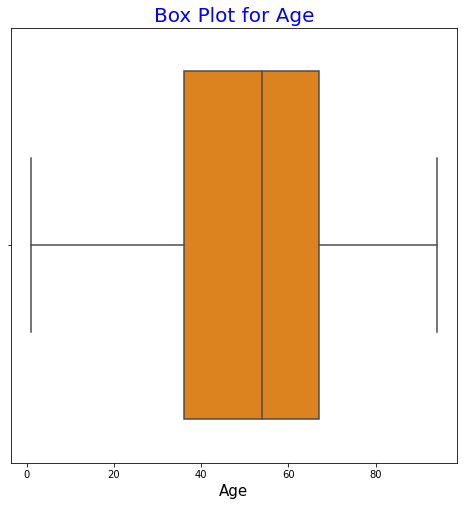

In [69]:
plt.figure(figsize=(8,8))
sns.boxplot(new_data['age'],color='#fb8500')
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

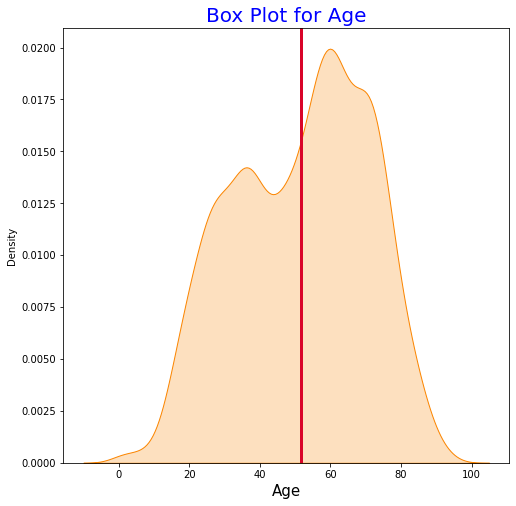

In [70]:
plt.figure(figsize=(8,8))
sns.kdeplot(new_data['age'],color='#fb8500',shade=True)
plt.axvline(new_data['age'].mean(),color='#d90429',linewidth=3)
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

In [71]:
new_data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,51.629011,4.590073,1.602901,101.681464,0.892852,99.192973
std,18.980473,23.342865,1.097044,43.187387,0.354230,45.852420
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.500000
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000
75%,67.000000,2.450000,2.200000,123.000000,1.070000,121.500000
max,94.000000,530.000000,10.600000,430.000000,2.320000,395.000000


## Save Clean Thyroid Data to CSV

In [72]:
# Let save the Clean data in .csv file 

new_data.to_csv('Data/Clean_Thyroid Detection.csv',index=False)

## Labelized & Scaling  Feature

In [73]:
data_scale =new_data.copy(deep=True)

### For Categorical Feature

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
data_scale[cat_col].head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,Classes
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative
2,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative
3,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative


In [76]:
# Labelized Categorical Feature

data_scale[cat_col]=data_scale[cat_col].apply(le.fit_transform)

In [77]:
data_scale[cat_col].head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,Classes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2


In [78]:
# Saving Labelized Method

import joblib
joblib.dump(le,'Labelized.lb')

['Labelized.lb']

### For Numerical Feature

In [79]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [80]:
data_scale[num_col].head()

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125.0,1.14,109.0
1,23,4.10,2.0,102.0,0.00,0.0
2,46,0.98,0.0,109.0,0.91,120.0
3,70,0.16,1.9,175.0,0.00,0.0
4,70,0.72,1.2,61.0,0.87,70.0


In [81]:
# Scalized Numerical Feature

data_scale[num_col] = mm.fit_transform(data_scale[num_col])

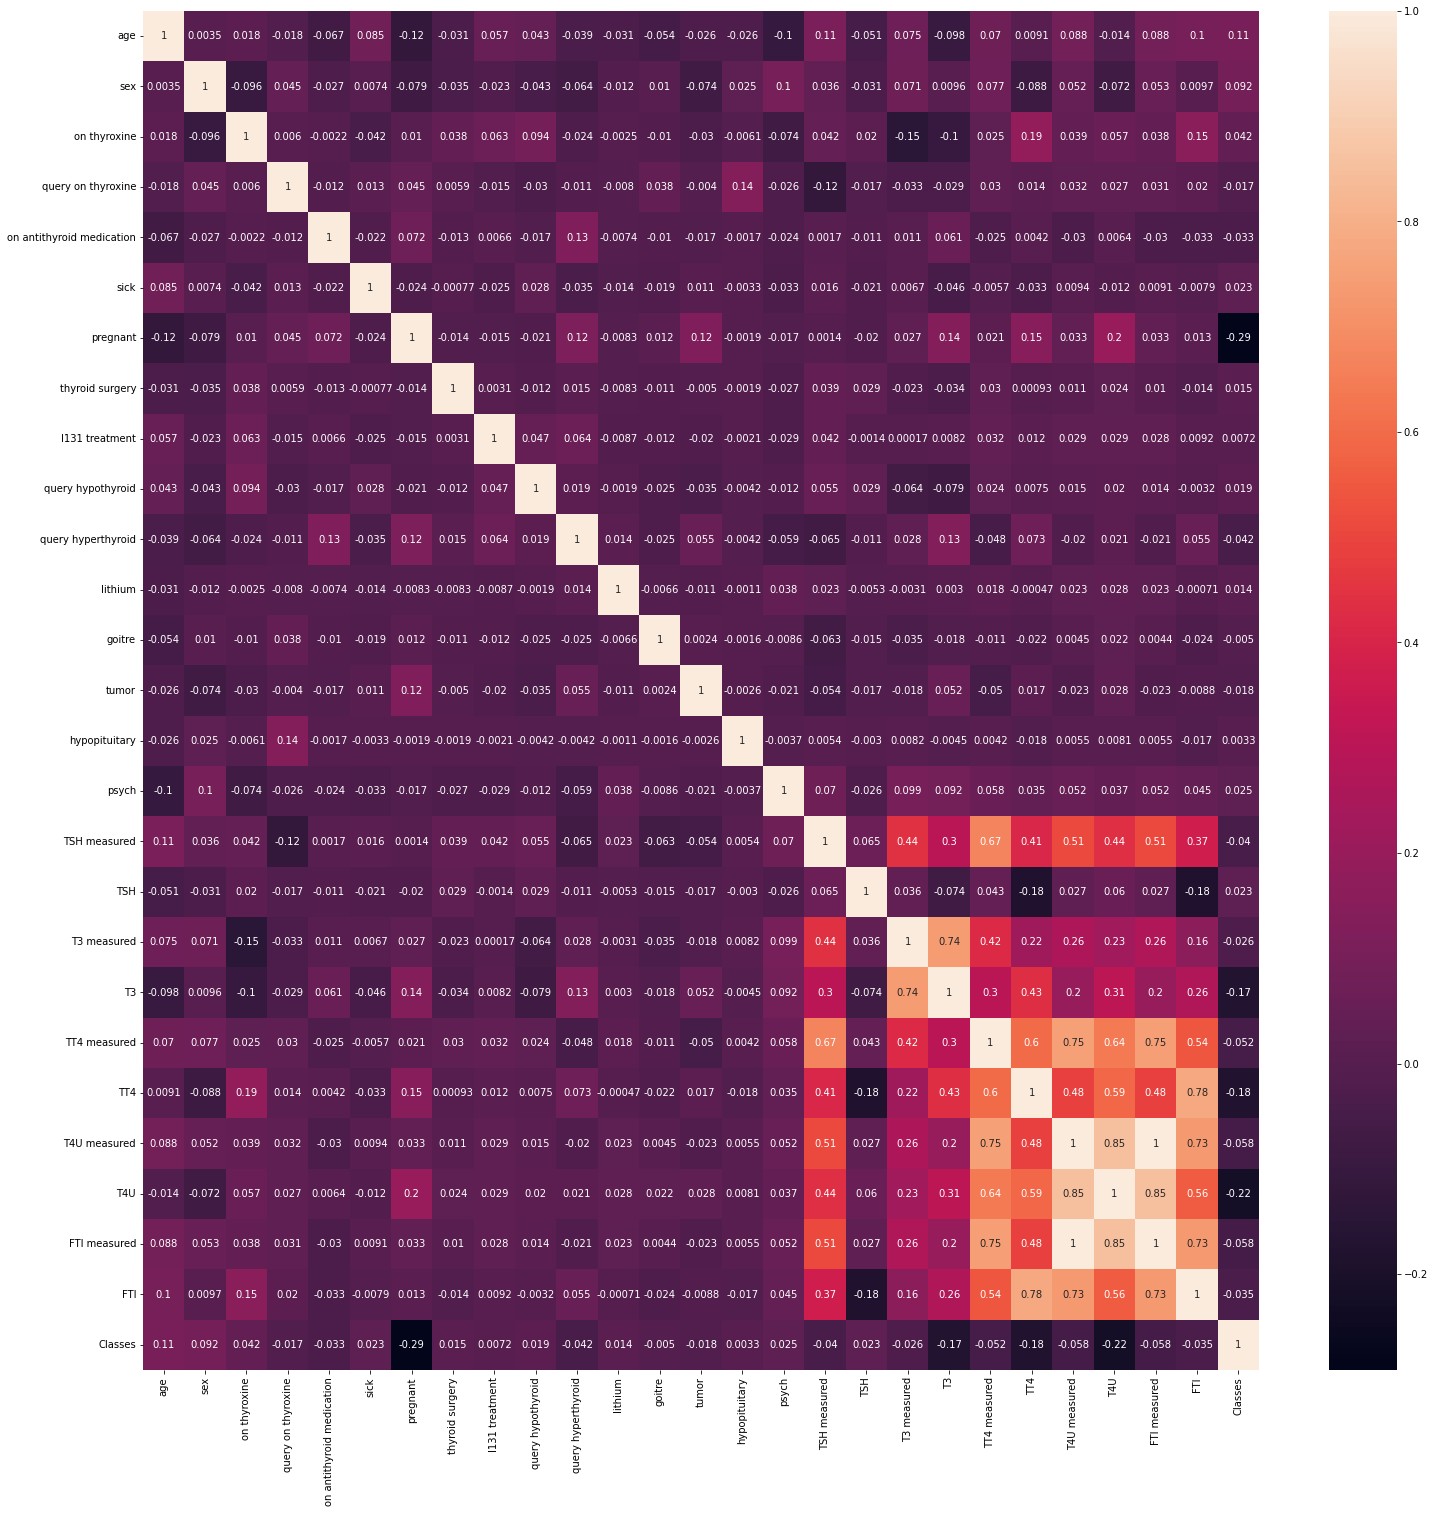

In [82]:
plt.figure(figsize=(25,25))
sns.heatmap(data_scale.corr(),annot=True);

In [83]:
data_scale.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.002453,1,0.235849,1,0.290698,1,0.491379,1,0.275949,2
1,0.236559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.007736,1,0.188679,1,0.237209,0,0.000000,0,0.000000,2
2,0.483871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.001849,0,0.000000,1,0.253488,1,0.392241,1,0.303797,2
3,0.741935,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000302,1,0.179245,1,0.406977,0,0.000000,0,0.000000,2
4,0.741935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.001358,1,0.113208,1,0.141860,1,0.375000,1,0.177215,2


In [84]:
# Saving Scalized Method

joblib.dump(mm,'Scalized.scl')

['Scalized.scl']

## Save Scaled Thyroid Data to CSV

In [85]:
data_scale.to_csv('Data/Scaled Thyroid Data.csv',index=False)

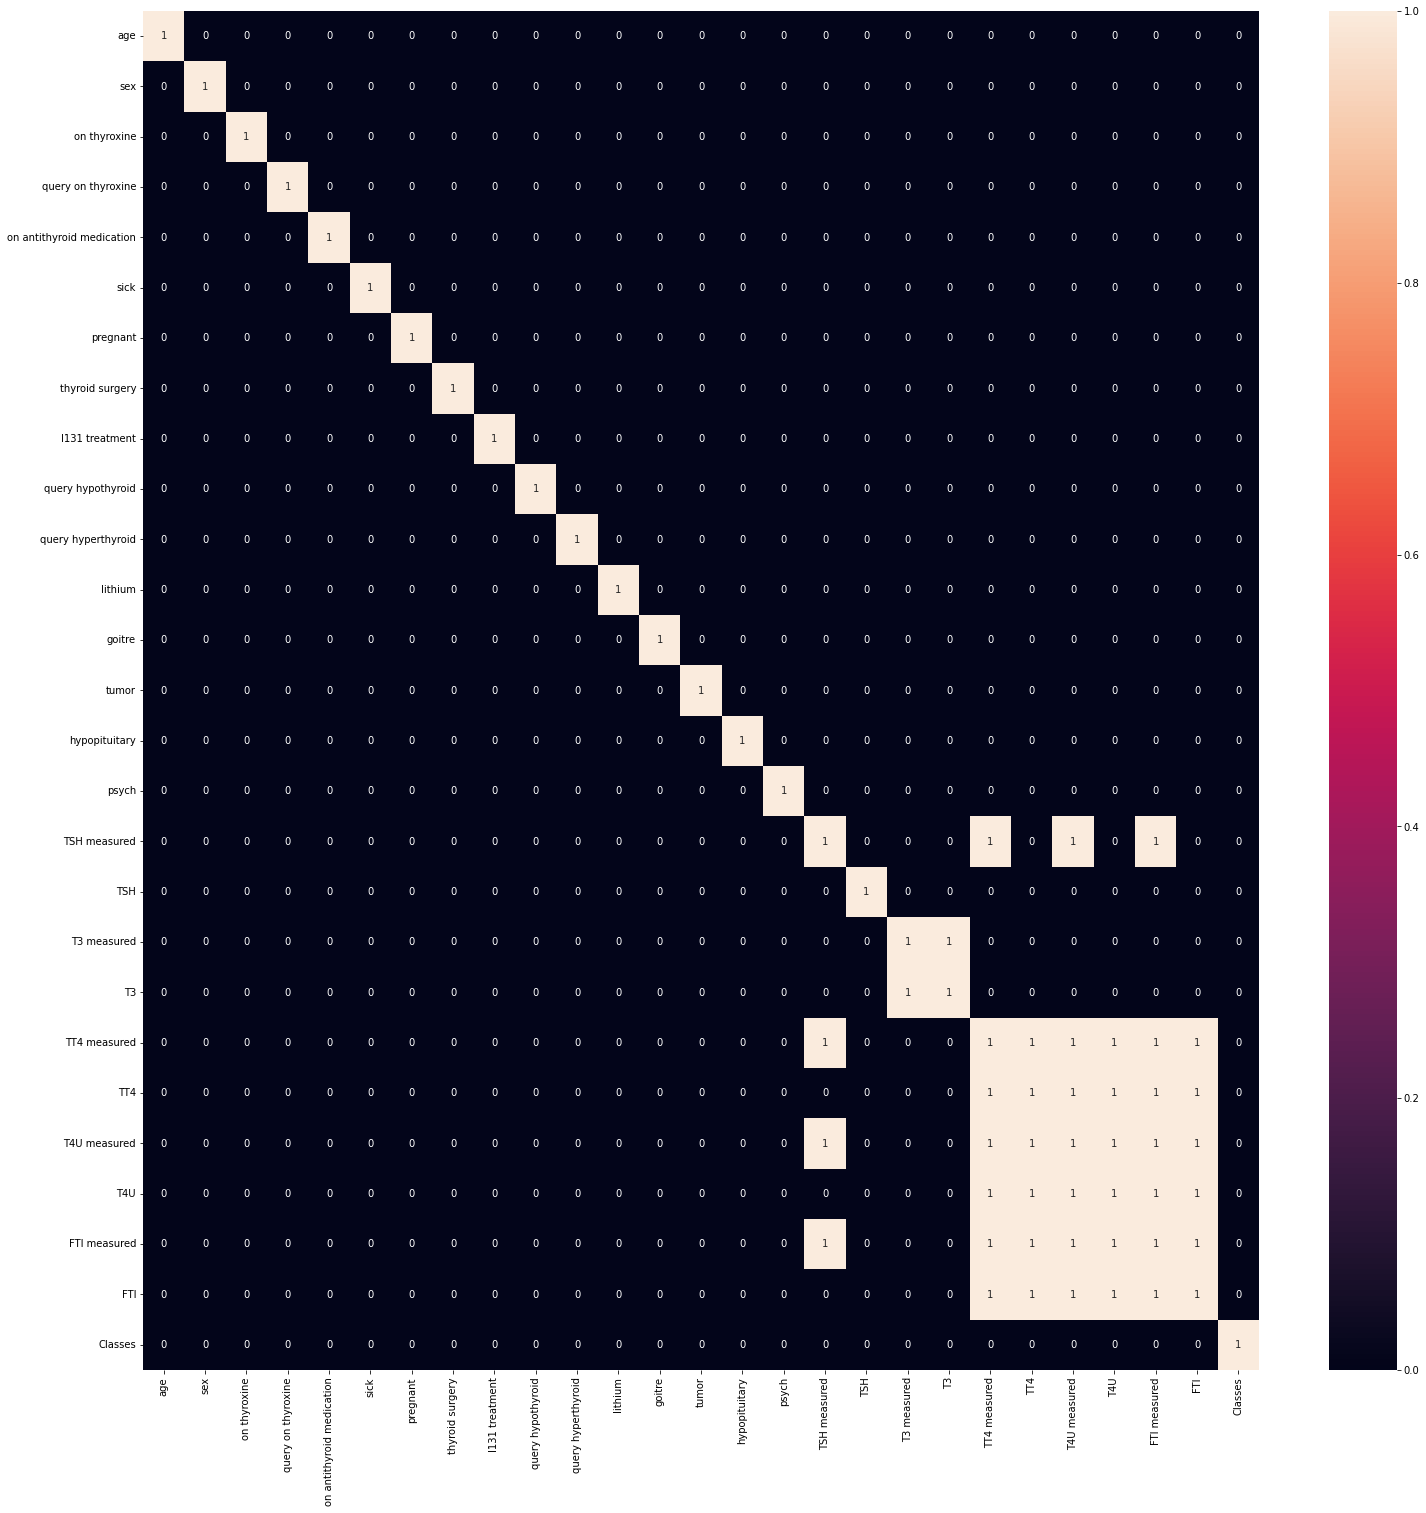

In [86]:
plt.figure(figsize=(25,25))
sns.heatmap(data_scale.corr()>0.45,annot=True);

# Feature Selection

In [87]:
# Data for Machine learn
ML_data = data_scale.drop(columns=['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
       'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych'])

In [88]:
ML_data

,age,sex,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,1,0.002453,1,0.235849,1,0.290698,1,0.491379,1,0.275949,2
1,0.236559,0,1,0.007736,1,0.188679,1,0.237209,0,0.000000,0,0.000000,2
2,0.483871,1,1,0.001849,0,0.000000,1,0.253488,1,0.392241,1,0.303797,2
3,0.741935,0,1,0.000302,1,0.179245,1,0.406977,0,0.000000,0,0.000000,2
4,0.741935,0,1,0.001358,1,0.113208,1,0.141860,1,0.375000,1,0.177215,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.311828,0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,2
3768,0.720430,0,1,0.001887,1,0.198113,1,0.288372,1,0.465517,1,0.288608,2
3769,0.784946,0,1,0.009623,1,0.169811,1,0.260465,1,0.461207,1,0.265823,2
3770,0.763441,1,1,0.001321,1,0.188679,1,0.190698,1,0.405172,1,0.220253,2


In [89]:
ML_data.to_csv("Data/ML_Thyroid Detection data.csv",index=False)